# 인공 신경망 소개 with 케라스 

> 인공신경망은 뇌에 있는 생물학적 뉴런 네트워크에서 영감을 받은 머신러닝 모델 

- 딥러닝의 핵심

## 주요 내용 
- 인공신경망의 초장기 구조 소개 
- `다층 퍼셉트론` 구조 소개 
- `케라스`를 이용한 인공 신경망 구현 

# 1. 생물학적 뉴런에서 인공 뉴런까지 
## 생물학적 뉴런 
- `수상돌기` : 신호를 받아들임
- `축삭돌기` : 신경 전달 물질을 생성
- `시냅스` : 신경 전달 물질을 전달

## 뉴런을 사용한 논리 연산 
- `인공 뉴런` : 하나 이상의 이진 입력과 출력을 가짐
- 단순히 입력이 일정 개수 만큼 활성화 되었을 때 출력
- 이러한 구조를 통해 어떤 명제도 계산 가능

## 퍼셉트론 
### 정의
> 퍼셉트론이란 가장 간단한 인공 신경망 구조
- `TLU` 혹은 `LTU` 라고도 불림

### 원리 
- 입력과 출력이 이진값이 아닌 `숫자`이고, 각 입력 연결은 가중치와 연관됨 

#### 과정
1) 입력 선형 함수 계산 
  - 입력 선형 함수 = $z = w_1x_1 + w_2x_2 + ... w_nx_n + b = w^Tx+b $
2) `계단 함수` 계산 
  - 입력 선형 함수의 결과를 계단 함수 $h_w(x) = step(z)$에 적용 
  - `계단 함수` : 그래프를 그렸을 때, 계단처럼 층이 나눠진 함수 
  - 주로 `헤비사이드 계산함수` 혹은 `부호 함수`를 사용

#### 헤비사이드 계단 함수 
$$
\textrm{heaviside(z)} = \begin{cases}
   0 &\text{if } z<0 \\
   1 &\text{if } z \geq 0
\end{cases}
$$
  

#### 부호 함수 
$$
\textrm{sgn(z)} = \begin{cases}
   -1 &\text{if } z<0 \\
   0 &\text{if } z=0 \\
   +1 &\text{if } z> 0
\end{cases}
$$


### 퍼셉트론의 구조 
- `밀집층` : TLU가 모든 입력에 연결되어 있는 층
- `입력층` : 입력을 구성
- `출력층` : 최종 출력을 생성하는 층 

### 출력층의 계산 
$$
h_{W,b}(X) = \phi(XW + b)
$$

- $X$ : 입력 특성의 행렬
  - 행 : 샘플 
  - 열 : 특성 
- $W$ : 가중치 행렬 
  - 모든 연결 가중치 포함 
  - 행 : 입력 
  - 열 : 출력층의 뉴런 
- $b$ : 편향 벡터 
  - 모든 뉴런의 편향을 포함
- $\phi$ : 활성화 함수 
  - TLU의 경우 계단함수 

### 퍼셉트론의 훈련 
> 퍼셉트론은 `헤브의 규칙` 알고리즘을 이용하여 학습 
- 뉴런이 다른 뉴런을 활성화 시킬 때 이 두 뉴런의 연결이 강해진다고 제안 
- 즉, 뉴런이 `동시에 활성화` 될 때 마다 이들 사이의 `연결 가중치`가  증가하는 경향 

#### 원리 
- 퍼셉트론은 네트워크가 예측 할 때 만드는 오차를 반영하도록 조금 변형된 규칙을 사용하여 훈련
- `오차`가 `감소`되도록 연결을 강화 
  - 한 개의 샘플이 주입되면 각 샘플에 대한 예측이 만들어짐 
  - `잘못된 예측` -> 입력 가중치 강화 

#### 퍼셉트론의 가중치 업데이트 규칙
$$ 
w_{i,j}^{(\textrm{next step})} = w_{i,j} + \eta \cdot (y_j - \hat{y}_j) \cdot x_i
$$

|기호|의미|
|---|---|
|$w_{i,j}$ | i번째 입력 뉴런과 j 번째 출력 뉴런 사이 `연결 가중치`|
|$x_i$ | 현재 훈련 샘플의 i번째 뉴런의 `입력값`|
|$\hat{y}_j$ | 현재 훈련 샘플의 j번째 출력 뉴런의 `출력값`|
|$y_j$ | 현재 훈련 샘플의 j번째 뉴런의 `타깃값`|
|$\eta$ | 학습률|

#### 퍼셉트론 수렴 이론 
- 출력 뉴런의 결정 경계는 `선형`
  - 복잡한 패턴의 경우 학습 불가 
- 훈련 샘플이 선형적으로 구분 될 수 있다면 정답에 수렴할 수 있음 


### 사이킷런에서 퍼셉트론 구현하기 
- 클래스 : Perceptron
  - SGD로 구현 가능 
  - loss = "perceptron"
  - learning_rate="constant"
  - eat0=1
  - penalty=None

- 예시 : 붓꽃 데이터를 이용한 퍼셉트론 실습

In [49]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

### 붓꽃 데이터 로드 
iris = load_iris(as_frame=True)
X=iris.data[["petal length (cm)","petal width (cm)"]].values

### 종이 Iris-setosa 인 것만
y=(iris.target==0)

### 모델 학습
per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

###예측 시행 
X_new = [[2,0.5],[3,1]]
y_pred = per_clf.predict(X_new)
print("예측 확인 : ", y_pred)

예측 확인 :  [ True False]


## 다중 퍼셉트론(MLP)
> 퍼셉트론을 여러 개 쌓아올려 일부의 제약을 줄임 
- 퍼셉트론에서 사용 할 수 없었던 `XOR`을 `다중 퍼셉트론`에서는 해결 가능 

### 구성 
- 입력층 
  - 입력층과 가까운 층 = `하위층`
- 출력층 
  - 출력층과 가까운 층 = `상위층`
- `은닉층`
  - 은닉층을 여러 개 쌓아올린 신경망 = `심층신경망(DNN)`

### 후진 모드 자동 비분
- 모든 그레디언트를 자동으로 효율적으로 계산하는 기법 

### 역전파
- 네트워크를 두 번만 통과(전진, 후진)하면 모든 단일 `파라미터`에 대한 `신경망 오차`의 그레디언트를 계산 가능 
- 신경망의 오차를 줄이기 위해 `가중치`와 `편향`을 조정 후 경사하강법 수행 
- 과정을 반복하면 신경망의 오차가 점차 감소 

#### 역전파의 작동 방식
##### 정방향 계산 
- `에포크` 진행
  - `에포트` : 하나의 미니 배치씩 진행하여 전체 훈련세트를 처리르 반복 
- 미니배치를 `입력층`을 통해 `네트워크`에 넣음 
- 첫번째 은닉층에 있는 모든 뉴런의 출력 계산 
- 다음 층의 출력을 계산 후 다음층으로 전달 
- 출력층에서 값 출력

##### 역방향 계산 
- 알고리즘이 네트워크의 출력 오차를 측정 
  - 손실 함수를 이용하여 기대하는 출력과 실제 출력 사이 비교 
- 출력 오차와 `출력 층의 각 연결`이 오차에 얼마나 기여 했는지 계산 
  - 미분의 `연쇄 법칙`을 이용 
- 연쇄 법칙을 이용해 이전 층의 `연결 가중치`가 오차에 얼마나 기여하는지 측정 
- 입력층에 도달 할 때까지 `역방향`으로 계산 
- 오차 그레디언트를 거꾸로 전파함으로서 모든 연결 가중치와 편향에 대한 `오차 그레디언트`를 측정 

##### 경사하강법 단계
- `오차 그레디언트`를 사용해 모든 `연결 가중치 `수정 

### 활성화 함수 
- `시그모이드 함수` 로 변경 
- 시그모이드 함수 $\sigma(z) = 1/ 1(1+\textrm{exp}(-z))$

- 시그모이드 말고 다른 활성화 함수를 사용 할 수도 있음 

|함수 명|읽는 법|계산식|설명|
|---|---|---|---|
|tanh 함수|하이퍼볼릭 탄젠트 함수| $\textrm{tahn}(z) = 2\sigma (2z) -1$|출력 범위가 -1 ~ 1 , 훈련 초기 각 층의 출력을 원점으로 모으는 경향이 있음|
|ReLU함수|렐루함수|$\textrm{ReLU}(z) = \textrm{max}(0,z)$|z=0에서 미분이 가능하지 않음 , 출력의 최대값이 없고 경사 하강법에 있는 일부 문제를 완화|


#### 활성화 함수가 필요한 이유 
- 선형 변환을 여러 번 해도 결과는 언제나 `선형`임 
- 층 사이에 `비선형성`을 추가 하지 않는 이상 계속 `선형`적임 
- 지속적으로 선형만 사용한다면 복잡한 문제를 풀 수 없음 
- `비선형 활성화 함수`가 있고 충분히 큰 심층 신경망은 이론적으로 `어떤 연속 함수`도 근사 가능 

- 활성화 함수와 해당 함수의 도함수

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import sys
import warnings
# UserWarning 카테고리의 모든 경고를 무시
warnings.filterwarnings("ignore", category=UserWarning)


if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

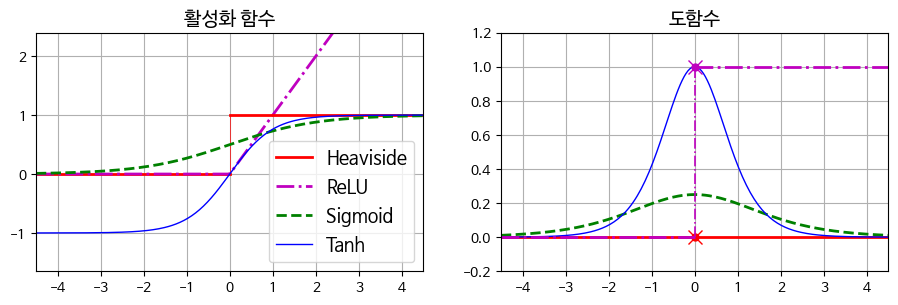

In [51]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("활성화 함수")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("도함수")
plt.axis([-max_z, max_z, -0.2, 1.2])

plt.show()

### 회귀를 위한 다층 퍼셉트론 
- 값 하나를 예측 하기 위해 출력 뉴런 하나만 필요 
    - 뉴런의 출력이 예측 값이 됨
- 다변량 회귀 에서는 출력 차원마다 출력 뉴런이 하나씩 필요 

#### 사이킷 런에서의 회귀 
- `MLPRegressor` 클래스 사용
- 출력층에서 `활성화 함수`를 사용하지 않기 때문에 원하는 값을 자유롭게 출력 가능 
- 출력이 항상 양수임을 보장하려면 출력층에  `ReLU`함수 사용

- 회귀 MLP의 전형적인 구조 

|하이퍼파라미터|일반적인 값|
|----|----|
|은닉층 수|일반적으로 다름 (1~5)|
|은닉층 뉴런 수|문제마다 다름 (10~100)|
|출력 뉴런 수|예측 차원마다 하나|
|은닉 층의 활성화 함수|ReLU|
|출력 층의 활성화 함수| 없음 / 출력이 양수 - ReLU나 소프트 플러스|
|손실함수|MSE 혹은 후버(이상치 있을 시)|


- 예시 
  - 50개의 뉴런을 가진 3개의 은닉층 을 가진 MLP
  - 입력특성을 표준화 하기 위해 파이프라인 생성 
  - 은닉층은 `relu` 활성화 함수 사용
  - 평균 제곱 오차를 최소화 하기 위해 `Adam` 사용해 L2 정규화 적용

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### 데이터 로드 
housing = fetch_california_housing()

### 훈련-테스트 데이터 분할 
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

### 훈련 - 검증 데이터 분할 
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, random_state=42)

### 객체 생성 
mlp_reg = MLPRegressor(
    hidden_layer_sizes=[50, 50, 50], 
    random_state=42
)

### 파이프라인 생성
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

### 모델 학습
pipeline.fit(X_train, y_train)

### 검증 데이터로 예측
y_val_predict = pipeline.predict(X_val)
### 평균 제곱 오차 계산 - 성능 예측
rmse =np.sqrt( mean_squared_error(y_val, y_val_predict))
print("검증 데이터 평균 제곱 오차 (RMSE):", rmse)

검증 데이터 평균 제곱 오차 (RMSE): 0.5053326657968513


### 분류를 위한 다층 퍼셉트론 
- 이진 분류 문제 : 시그모이드 활성화 함수를 가진 하나의 출력 뉴런만 필요 
  - 0 또는 1로 분류
  - 양성 클래스에 대한 확률로도 해석 가능 

#### 사이킷런에서의 분류
- `MLPClassifier` 클래스 사용

#### 다중 레이블 분류

|하이퍼파라미터|이진분류|다중레이블분류|다중분류|
|---|---|---|---|
|은닉층 수|1개|이진 레이블 마다 1개|클래스 마다 1개|
|출력 뉴런 수|1개|이진 레이블 마다 1개|클래스마다 1개|
|출력 층의 활성화 함수|시그모이드|시그모이드|소프트맥스|
|손실 함수|크로스 엔트로피|크로스 엔트로피|크로스 엔트로피|


In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
print("accuracy : ", accuracy)

accuracy :  1.0


# 2. 케라스를 이용한 MLP 구현 

## 케라스 
- 모든 종류의 신경망을 손쉽게 만들고 훈련,평가, 실행 할 수 있는 텐서플로의 고수준 딥러닝 API

### 케라스에서 딥러닝 하는 방법 
1. 시퀀셜 API 
2. 함수형 API
3. 서브클래싱 API

## 시퀀셜 API를 이용한 이미지 분류기

- 예시 : 패션 MNIST 데이터셋을 이용한 MLP 분류기 생성

- 데이터셋 적재 
  - 훈련 세트 : 6만개 (검증세트 5천개)
  - 테스트 세트 : 1만개 
- `2D` 데이터 (28 x 28)로 생성 (sklearn은 1D)
- 픽셀 강도를 0~255 -> 0~1로 변경

In [54]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

### 훈련 - 검증 데이터 분할
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

### 훈련 데이터 확인 
print("훈련 데이터 갯수,행,열 : ", X_train.shape)

### 훈련 데이터의 타입 확인 
print("훈련 데이터 타입 : ", X_train.dtype)

### 픽셀의 강도 전처리 (표준화)
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

### 클래스 리스트 생성 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### 첫번째 데이터의 클래스 확인 
print("클래스 이름 : ", class_names[y_train[0]])

훈련 데이터 갯수,행,열 :  (55000, 28, 28)
훈련 데이터 타입 :  uint8
클래스 이름 :  Ankle boot


### 시퀀셜 API 모델 생성 
- 두 개의 은닉층으로 이루어진 분류용 다층 퍼셉트론 모델 생성 
- 구성 
  - 입력층 
  - Flatten층 추가 
  - 은닉층 2개 추가  - ReLU 함수 
  - 출력층 추가 - 소프트맥스 활성화 함수

#### 정보 확인 매소드
- `summary()` 매소드를 이용하여 층 정보 출력 가능
- `layer` 속성을 이용해 층 목록 확인 가능
- `get_layer()` : 층 이름 선택 가능  
- `get_weights() / set_weights` : 각 파라미터에 대한 접근 

In [55]:
### 랜덤 시드 설정 
tf.random.set_seed(42)

### 시퀀셜 API 모델 생성
model = tf.keras.Sequential()

### 입력층 추가
model.add(tf.keras.layers.Input(shape=[28, 28]))

### Flatten 층 추가 - 2D 데이터를 1D로 변환
model.add(tf.keras.layers.Flatten())

### 은닉층 추가  - ReLU 활성화 함수 사용
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

### 출력층 추가 - 소프트맥스 활성화 함수 사용
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [56]:
### 위의 코드를 아래와 같이 줄여서 표현 가능 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

- `summary` : 층 정보 출력 
  - `Dense`층은 많은 파라미터를 가짐 
    - 784 x 300 개의 연결 가중치 + 300개의 편향 
    - 모델 학습의 충분한 유연성을 가짐 
    - 과대적합의 위험이 있음 

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

- `layers` : 층 정보 출력

In [58]:
print("모델의 층 정보 출력 : layer")
model.layers

모델의 층 정보 출력 : layer


[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

- `get_layer()` : 층 이름 선택 가능 

In [60]:
print("특정 층 정보 확인")
hidden1 = model.layers[1]
print("층 이름 : ", hidden1.name)
print(f"model.get_layer('dense_12') is hidden1 : {model.get_layer('dense_12') is hidden1}")


특정 층 정보 확인
층 이름 :  dense_12
model.get_layer('dense_12') is hidden1 : True


- 가중치와 편향 확인

In [61]:
weights, biases = hidden1.get_weights()
print("가중치 \n", weights[:2])
print("편향 \n", biases[:2])
print("가중치 shape : ", weights.shape)
print("편향 shape : ", biases.shape)

가중치 
 [[-7.22535327e-02 -6.05281368e-02  6.26243502e-02 -7.25335255e-02
  -3.67427953e-02  4.54234332e-02 -3.94190811e-02  1.95200965e-02
   3.72037664e-02  6.62807673e-02 -4.74712513e-02 -5.14061302e-02
  -5.93207777e-04 -1.96041763e-02 -4.14579585e-02  5.82841039e-02
   2.56276131e-02  6.45793825e-02  3.78545150e-02 -1.77525952e-02
   7.06805885e-02  3.24220806e-02  1.86607912e-02  4.74618822e-02
  -3.66928615e-02 -6.92915097e-02 -1.53467394e-02 -3.37472595e-02
  -4.36717868e-02 -5.30765019e-02 -2.55266502e-02  6.58753067e-02
   6.50259405e-02 -5.41549996e-02 -5.14048673e-02 -1.68399997e-02
  -7.21252337e-02  6.56436831e-02 -8.94564390e-03 -6.25836700e-02
  -3.96516584e-02 -4.90080938e-02  2.61774510e-02 -3.96582410e-02
   7.01883435e-03 -4.87104878e-02 -1.75115541e-02 -1.28306411e-02
  -1.20209157e-03 -4.16612886e-02  2.30947956e-02  4.25514802e-02
  -3.56979817e-02  7.17055649e-02  5.11901826e-02 -2.00062580e-02
  -1.73144676e-02 -1.49792805e-02 -5.79045862e-02  6.86167628e-02
  -6

#### 가중치/편향 초기화
- 가중치 초기화 : 대칭성을 깨트리기 위해 Dense 층의 가중치 초기화
- 편향 : 0 으로 초기화
- 초기화 방법 
  - `kernel_initializer` : 가중치 초기화 방법 선택  가능 

### 모델 컴파일 
- compile() 메서드를 이용
  - 손실 함수 지정
  - 옵티마이저 지정
  - 계산 할 지표 지정 가능 

#### 손실 함수 
- `sparse_categorical_crossentropy` : 클래스가 배타적인 경우 싸용 
- `categorical_crossentropy` : 샘플마다 클래스 별 타깃 확률을 가지고 있는 경우 
- `binary_crossentropy` : 이진 분류 및 다중 레이블 이진 분류 시 (출력층을 `sigmoid`로 변경)

#### 옵티마이저 
- sgd : 확률적 경사 하강법 사용 
    - 역전파 알고리즘 수행 

#### 평가 지표 
- accuracy : 정확도  

In [62]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

### 모델 훈련과 평가 
- fit() 메서드를 이용하여 모델 훈련
- 입력 특성과 타깃 클래스, 에포크 횟수와 검증 세트 전달 
  - 검증 세트를 사용해 손실과 추가적인 측정 지표 계산 


#### class_weight
- 훈련세트가 편중되어 있는 경우 fit 에서 매개 변수로 지정이 필요 

#### sample_weight
- 샘플 별로 가중치 부여 
- `class_weight`를 모두 지정되는 경우 도 값을 곱하여 사용 
- `vaildation_data` 튜플의 세번째 원소로 검증 세트에 대한 샘플 별 가중치 지정 가능 

#### history 객체 
- `history.params` :  훈련 파라미터 
- `history.epoch` : 수행된 에포크
- `history.history` : 검증세트에 대한 손실과 측정 지표 

In [63]:
history = model.fit(
    X_train, 
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6794 - loss: 1.0249 - val_accuracy: 0.8344 - val_loss: 0.4996
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8275 - loss: 0.5047 - val_accuracy: 0.8462 - val_loss: 0.4468
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8443 - loss: 0.4523 - val_accuracy: 0.8506 - val_loss: 0.4222
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8546 - loss: 0.4224 - val_accuracy: 0.8556 - val_loss: 0.4067
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8623 - loss: 0.4010 - val_accuracy: 0.8586 - val_loss: 0.3953
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8667 - loss: 0.3841 - val_accuracy: 0.8588 - val_loss: 0.3858
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.3693 - val_accuracy: 0.8612 - val_loss: 0.3782
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8754 - loss: 0.3563 - 

- 학습 곡선 그리기 
  - 정확도와 검증 정확도가 꾸준 히 상승 
  - 훈련 손실 및 검증 손실은 감소 
- 시간이 지남에 따라 `과대적합`이 발생하고 있음  

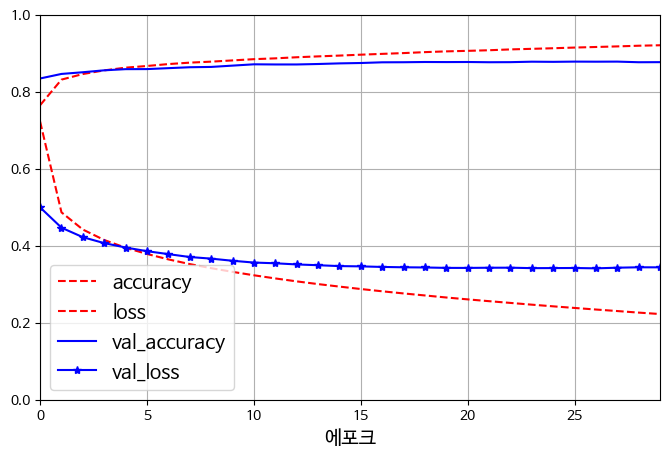

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0,29],
    ylim=[0,1],
    grid=True,
    xlabel="에포크",
    style=["r--","r--","b-","b-*"]
    )

plt.show()

#### 하이퍼파라미터 튜닝 
- 모델 성능이 만족스럽지 않으면 하이퍼파라미터 튜닝 고려 

  - 학습률 
  - 옵티마이저
  - 층의 개수 
  - 층의 뉴런 개수 
  - 은닉층의 활성화 함수 
  - 배치 크기 

#### 모델 평가 
- evaluate() 메서드를 이용하여 모델 평가

In [65]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3714


[0.3701416850090027, 0.871999979019165]

### 모델 예측 
- `predict()` 함수를 이용하여 샘플 예측 

#### 확률 추정 
- 각 클래스 별로 각각 확률 추정 
- 사이킷런의 `predict_proba()`와 유사 

In [66]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.01, 0.  , 0.84],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

- 분류 확인 

예측 클래스 인덱스  :  [9 2 1]
예측 클래스 ['Ankle boot' 'Pullover' 'Trouser']


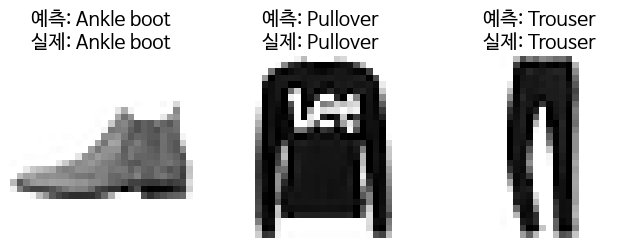

In [67]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
print("예측 클래스 인덱스  : ", y_pred)

print("예측 클래스",np.array(class_names)[y_pred])

### 분류 이미지 확인
y_new = y_test[:3]
plt.figure(figsize=(8, 4))
for index, (image, label) in enumerate(zip(X_new, y_new)):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.title(f"예측: {class_names[y_pred[index]]}\n실제: {class_names[label]}")    

## 시퀀셜 API - 회귀용 다층 퍼셉트론 
- 분류와의 차이점 : 
  - 출력층에 뉴런 1개
  - 활성화 함수 사용 X 
  - 손실 함수 : MSE
  - 측정 지표 : RMSE
  - 옵티마이저 : Adam

In [69]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [70]:
### 랜덤 시드 설정 
tf.random.set_seed(42)

### 정규화 층 추가
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

### 은닉층 + 출력층 추가 
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

### 옵티마이저 
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

### 모델 컴파일
model.compile(
    loss="mse",
    optimizer=optimizer,
    metrics=["RootMeanSquaredError"]
)

### adpt() : 정규화 층의 가중치 학습
norm_layer.adapt(X_train)

#### 모델 학습
history = model.fit(
    X_train, 
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

### 성능 지표 확인
mse, rmse = model.evaluate(X_test, y_test)
print("테스트 데이터 평균 제곱 오차 (MSE):", mse)
print("테스트 데이터 평균 제곱 오차 (RMSE):", rmse)

### 예측 
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.2631 - loss: 1.6994 - val_RootMeanSquaredError: 0.6955 - val_loss: 0.4837
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6530 - loss: 0.4271 - val_RootMeanSquaredError: 0.7790 - val_loss: 0.6068
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6101 - loss: 0.3723 - val_RootMeanSquaredError: 0.5813 - val_loss: 0.3379
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5964 - loss: 0.3558 - val_RootMeanSquaredError: 0.9192 - val_loss: 0.8450
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5840 - loss: 0.3412 - val_RootMeanSquaredError: 1.1790 - val_loss: 1.3899
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5775 - loss: 0.3337 - val_RootMeanSquaredError: 1.1780 - val_loss: 1.3877
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5697 - los

## 함수형 API로 모델 만들기
- 순차적이지 않은 신경망과 같은 복잡한 모델을 만들 때 유용

- 예시 : `와이드 & 딥`
  - 입력의 일부는 깊은 신경망에 입력하고, 나머지는 얕은 신경망에 입력하여 예측을 결합하는 모델
  - 간단한 규칙과 복잡한 패턴을 모두 학습하는데 유리  

- 예시 : 캘리포니아 주택 데이터 - 와이드&딥 모델 적용

In [71]:
tf.compat.v1.reset_default_graph()
tf.random.set_seed(42)

### 표준화를 위해 정규화 층 추가
normalization_layer = tf.keras.layers.Normalization()

### ReLU 활성화 함수를 가진 은닉층 2개 추가
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")

### Concatenate 층 추가 - 입력층과 두번째 은닉층을 연결
concat_layer = tf.keras.layers.Concatenate()
### 출력층 추가 - 뉴런 1개
output_layer = tf.keras.layers.Dense(1)

### 정규화 층을 객체처럼 불러움
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)

hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_7     │ (None, 8)         │         17 │ input_layer_9[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 30)        │        270 │ normalization_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 30)        │        930 │ dense_23[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 38)        │          0 │ normalization_7[… │
│ (Concatenate)       │                   │            │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 1)         │         39 │ concatenate_3[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

- 컴파일, 학습, 평가

In [72]:
input_wide = tf.keras.layers.Input(shape=[5])  # 특성 0 ~ 4
input_deep = tf.keras.layers.Input(shape=[6])  # 특성 2 ~ 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [73]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [74]:
X_train_wide.shape

(11610, 5)

In [75]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.6075 - loss: 2.6879 - val_RootMeanSquaredError: 1.3201 - val_loss: 1.7426
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7572 - loss: 0.5740 - val_RootMeanSquaredError: 1.2739 - val_loss: 1.6229
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6934 - loss: 0.4809 - val_RootMeanSquaredError: 1.7276 - val_loss: 2.9847
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6639 - loss: 0.4409 - val_RootMeanSquaredError: 1.7670 - val_loss: 3.1222
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6457 - loss: 0.4170 - val_RootMeanSquaredError: 2.0007 - val_loss: 4.0028
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6371 - loss: 0.4060 - val_RootMeanSquaredError: 2.2632 - val_loss: 5.1220
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6310 - los

## 서브클래싱 API 동적 모델 생성 
### 시퀀셜 API와 함수형 API 의 단점
- 시퀀쎨 API와 함수형 API -선언적 
  - 장점 
    - 모델 저장, 복사, 공유가 쉬움 
    - 모델 구조 출력 및 복사가 쉬움 
 - 단점 
   - 정적인 구조를 가짐 -> 동적인 구조를 필요로 하는 경우에 적합하지 않음  

   ### 서브클래싱 API의 장점 
- 동적 모델 구현 가능 
- 명령형 프로그래밍 스타일을 구현 가능 
    - for문이나 if문, 저수준 텐서플로 연산 등에서 사용 가능 

### 케리스를 이용한 서브클래싱 API 모델 생성
- Model 클래스로 필요한 층 생성 
- `call()` 메소드로 수행하려는 연산 정의 
- `WideAndDeepModel` 클래스를 상속받아 모델 생성

- 예제 : WideAndDeep 모델 생성 

In [76]:
import keras

@keras.saving.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # 모델 이름을 지정하는 데 필요합니다
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


tf.random.set_seed(42) 

### 객체 생성
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 1.8685 - RootMeanSquaredError_1: 1.7527 - loss: 3.5547 - mse_loss: 3.1359 - val_RootMeanSquaredError: 0.9561 - val_RootMeanSquaredError_1: 1.0901 - val_loss: 0.9415 - val_mse_loss: 1.1880
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.8603 - RootMeanSquaredError_1: 0.8990 - loss: 0.7484 - mse_loss: 0.8104 - val_RootMeanSquaredError: 0.7338 - val_RootMeanSquaredError_1: 0.7853 - val_loss: 0.5463 - val_mse_loss: 0.6166
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7416 - RootMeanSquaredError_1: 0.7608 - loss: 0.5531 - mse_loss: 0.5791 - val_RootMeanSquaredError: 0.9014 - val_RootMeanSquaredError_1: 1.2520 - val_loss: 0.8880 - val_mse_loss: 1.5668
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6888 - RootMeanSquaredError_1: 0.7314 - loss: 0.4806 - mse_loss: 0.5350 - val_RootMeanSquaredError: 1.0674 - val_RootMeanSquaredEr

## 모델 저장 및 복원

### 모델의 저장
- `model.save` 를 이용해 케라스 모델을 저장 가능 
  - 저장된 파일에는 모델의 아키텍처와 로직이 직렬화된 계산 그래프 형태로 포함 -> 소스코드 배포 필요 X 

#### 저장 모델의 특징 
- `keras.metadata.pb` : 케라스에서 필요한 메타데이터를 포함 
- `variables/` : 파라미터 값 (연결 가중치, 편향, 정규화 통계치, 옵티마이저 등)
- `assets/` : 모델의 추가적인 자원 (데이터 샘플, 특성 이름, 클래스 이름 등)

In [80]:
import shutil
shutil.rmtree("my_keras_model", ignore_errors=True)

model.save("my_keras_model.keras")

#### 모델 로드 
- `save_weight` 와 `load_weight` 로 파라미터 값만 저장 / 로드 가능 
  - 장점 : 가중치만 저장하는 것이 전체 모델을 저장 하는 것 보다 공간을 덜 사용함 

In [81]:
### 모델 로드
model = tf.keras.models.load_model("my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [82]:
model.save_weights("my_weights.weights.h5")
model.load_weights("my_weights.weights.h5")
model.save("my_model.keras")

#### 콜백 사용하기 
- fit 에서 `callbacks` 인자를 사용해 콜백을 전달 가능
  - 훈련의 시작 전이나 후에 호출 할 객체 리스트를 지정 가능 

In [85]:
shutil.rmtree("my_checkpoints", ignore_errors=True)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5885 - RootMeanSquaredError_1: 0.6440 - loss: 0.3532 - mse_loss: 0.4150 - val_RootMeanSquaredError: 1.0422 - val_RootMeanSquaredError_1: 1.3678 - val_loss: 1.1647 - val_mse_loss: 1.8700
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5883 - RootMeanSquaredError_1: 0.6423 - loss: 0.3528 - mse_loss: 0.4128 - val_RootMeanSquaredError: 1.2049 - val_RootMeanSquaredError_1: 1.4579 - val_loss: 1.5192 - val_mse_loss: 2.1246
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5849 - RootMeanSquaredError_1: 0.6394 - loss: 0.3489 - mse_loss: 0.4091 - val_RootMeanSquaredError: 0.6696 - val_RootMeanSquaredError_1: 0.7701 - val_loss: 0.4629 - val_mse_loss: 0.5929
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5805 - RootMeanSquaredError_1: 0.6307 - loss: 0.3432 - mse_loss: 0.3980 - val_RootMeanSquaredError: 0.7968 - val_RootMeanSquaredEr

In [86]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5706 - RootMeanSquaredError_1: 0.6178 - loss: 0.3313 - mse_loss: 0.3819 - val_RootMeanSquaredError: 0.7781 - val_RootMeanSquaredError_1: 0.9504 - val_loss: 0.6352 - val_mse_loss: 0.9030
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5680 - RootMeanSquaredError_1: 0.6159 - loss: 0.3283 - mse_loss: 0.3795 - val_RootMeanSquaredError: 1.2878 - val_RootMeanSquaredError_1: 1.0906 - val_loss: 1.6115 - val_mse_loss: 1.1889
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5680 - RootMeanSquaredError_1: 0.6125 - loss: 0.3280 - mse_loss: 0.3754 - val_RootMeanSquaredError: 0.8504 - val_RootMeanSquaredError_1: 0.9419 - val_loss: 0.7395 - val_mse_loss: 0.8868
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5666 - RootMeanSquaredError_1: 0.6122 - loss: 0.3265 - mse_loss: 0.3750 - val_RootMeanSquaredError: 1.0759 - val_RootMeanSquar

## 텐서보드로 시각화 하기 
### 텐서보드 란? 
> 인터렉티브 시각화 도구 

In [88]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

In [89]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.8060 - loss: 3.3472 - val_RootMeanSquaredError: 1.0139 - val_loss: 1.0280
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.9654 - loss: 0.9345 - val_RootMeanSquaredError: 0.8032 - val_loss: 0.6452
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.8289 - loss: 0.6890 - val_RootMeanSquaredError: 0.7417 - val_loss: 0.5501
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7773 - loss: 0.6057 - val_RootMeanSquaredError: 0.7129 - val_loss: 0.5082
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7489 - loss: 0.5622 - val_RootMeanSquaredError: 0.6965 - val_loss: 0.4851
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7294 - loss: 0.5333 - val_RootMeanSquaredError: 0.6865 - val_loss: 0.4712
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7148 - los

In [90]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [91]:
if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

# 신경망 하이퍼파라미터 튜닝

## 신경망의 유연성 
- 조정 할 하이퍼파라미터가 많기 때문에 유연성이 단점이 됨 
- GridSearhCV 혹은 RandomizedSearchCV를 사용해 미세 튜닝 가능함 
- 하지만 , `케라스 튜너`를 이용해 가능

In [95]:
### 데이터 셋 로드 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

tf.compat.v1.reset_default_graph()
tf.random.set_seed(42)

- MNIST 데이터셋을 이용한 MLP 모델 생성 

In [98]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

- 랜덤 서치를 수행하여 매서드 호출 

In [99]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 45s]
val_accuracy: 0.8309999704360962

Best val_accuracy So Far: 0.8557999730110168
Total elapsed time: 00h 03m 54s


In [100]:
### 최상의 모델 및 하이퍼 파라미터 출력 
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}